# Bank Customer Churn Prediction Usin ANN


### Import necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

### Load the  Data

In [25]:
df = pd.read_csv('Customer-Churn-Records.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425


In [26]:
df.shape

(10000, 18)

### Data Exploration

In [3]:
# drop unnecessary column(s)

df.drop(columns=['RowNumber','CustomerId','Surname'], inplace = True)

In [4]:
df.dtypes

CreditScore             int64
Geography              object
Gender                 object
Age                     int64
Tenure                  int64
Balance               float64
NumOfProducts           int64
HasCrCard               int64
IsActiveMember          int64
EstimatedSalary       float64
Exited                  int64
Complain                int64
Satisfaction Score      int64
Card Type              object
Point Earned            int64
dtype: object

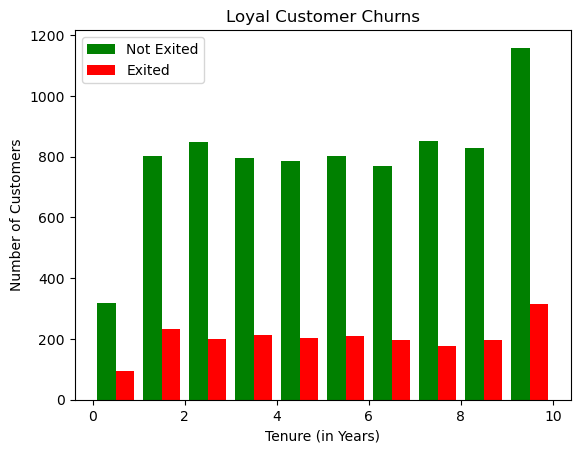

In [5]:
#Check how many loyal customer are leaving or not (Tenure vs Exited)

Tenure_not_Exited = df[df.Exited == 0].Tenure
Tenure_Exited = df[df.Exited == 1].Tenure

#visualize no.of loyal customers has exited and not

plt.xlabel("Tenure (in Years)")
plt.ylabel("Number of Customers")
plt.title("Loyal Customer Churns")

plt.hist([Tenure_not_Exited,Tenure_Exited], color = ['Green','Red'], label = ['Not Exited','Exited'])
plt.legend()



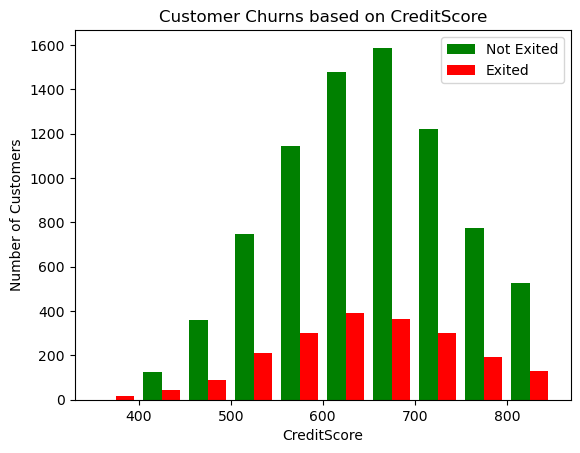

In [6]:
#Check how many loyal customer are leaving or not (CreditScore vs Exited)

CreditScore_not_Exited = df[df.Exited == 0].CreditScore
CreditScore_Exited = df[df.Exited == 1].CreditScore

#visualization based on CreditScore and Customer Exit
plt.xlabel("CreditScore")
plt.ylabel("Number of Customers")
plt.title("Customer Churns based on CreditScore")

plt.hist([CreditScore_not_Exited,CreditScore_Exited], color = ['Green','Red'], label = ['Not Exited','Exited'])
plt.legend()

In [7]:
for column in df:
        print(f'{column}: {df[column].unique()}')

CreditScore: [619 608 502 699 850 645 822 376 501 684 528 497 476 549 635 616 653 587
 726 732 636 510 669 846 577 756 571 574 411 591 533 553 520 722 475 490
 804 582 472 465 556 834 660 776 829 637 550 698 585 788 655 601 656 725
 511 614 742 687 555 603 751 581 735 661 675 738 813 657 604 519 664 678
 757 416 665 777 543 506 493 652 750 729 646 647 808 524 769 730 515 773
 814 710 413 623 670 622 785 605 479 685 538 562 721 628 668 828 674 625
 432 770 758 795 686 789 589 461 584 579 663 682 793 691 485 650 754 535
 716 539 706 586 631 717 800 683 704 615 667 484 480 578 512 606 597 778
 514 525 715 580 807 521 759 516 711 618 643 671 689 620 676 572 695 592
 567 694 547 594 673 610 767 763 712 703 662 659 523 772 545 634 739 771
 681 544 696 766 727 693 557 531 498 651 791 733 811 707 714 782 775 799
 602 744 588 747 583 627 731 629 438 642 806 474 559 429 680 749 734 644
 626 649 805 718 840 630 654 762 568 613 522 737 648 443 640 540 460 593
 801 611 802 745 483 690 492 709 705 5

In [8]:
#Check unique values in each categorical column

def unique_column_values(df):
    for column in df:
        if df[column].dtypes == 'object':
            print(f'{column}: {df[column].unique()}')

In [9]:
unique_column_values(df)

Geography: ['France' 'Spain' 'Germany']
Gender: ['Female' 'Male']
Card Type: ['DIAMOND' 'GOLD' 'SILVER' 'PLATINUM']


In [10]:
df['Gender'].replace({'Female':1, 'Male':0}, inplace=True)

In [11]:
df['Gender'].unique()

array([1, 0], dtype=int64)

In [12]:
df1 = pd.get_dummies(data=df, columns=['Geography','Card Type'])
df1 = df1.astype(int)
df1.sample(6)

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Point Earned,Geography_France,Geography_Germany,Geography_Spain,Card Type_DIAMOND,Card Type_GOLD,Card Type_PLATINUM,Card Type_SILVER
4984,553,1,31,4,0,2,1,1,89087,0,0,2,393,1,0,0,1,0,0,0
8642,499,1,44,6,77627,2,1,0,108222,0,0,4,545,0,1,0,0,0,1,0
5086,719,0,50,2,0,2,0,0,10772,0,0,4,930,0,0,1,0,0,1,0
1193,363,1,28,6,146098,3,1,0,100615,1,1,2,324,0,0,1,0,0,0,1
776,622,1,58,7,116922,1,1,0,120415,1,1,2,475,0,1,0,0,1,0,0
8989,640,1,31,10,118613,1,1,0,168469,0,0,3,573,0,1,0,1,0,0,0


In [14]:
df1.dtypes

CreditScore           int32
Gender                int32
Age                   int32
Tenure                int32
Balance               int32
NumOfProducts         int32
HasCrCard             int32
IsActiveMember        int32
EstimatedSalary       int32
Exited                int32
Complain              int32
Satisfaction Score    int32
Point Earned          int32
Geography_France      int32
Geography_Germany     int32
Geography_Spain       int32
Card Type_DIAMOND     int32
Card Type_GOLD        int32
Card Type_PLATINUM    int32
Card Type_SILVER      int32
dtype: object

In [19]:
#Scale the column values

coulmn_for_scale = ['CreditScore','Age','Balance','EstimatedSalary','Point Earned']

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

df1[coulmn_for_scale] = scaler.fit_transform(df1[coulmn_for_scale])


In [23]:
df1.sample(4)

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Point Earned,Geography_France,Geography_Germany,Geography_Spain,Card Type_DIAMOND,Card Type_GOLD,Card Type_PLATINUM,Card Type_SILVER
9777,0.710,1,0.283784,3,0.367576,1,1,1,0.272556,0,0,2,0.379115,1,0,0,0,1,0,0
6727,0.790,1,0.243243,9,0.000000,1,1,0,0.097979,1,1,1,0.955732,1,0,0,0,0,0,1
3880,0.654,1,0.729730,8,0.000000,2,1,1,0.768038,0,0,2,0.251986,1,0,0,0,0,1,0
5943,0.590,1,0.500000,7,0.000000,2,1,1,0.091799,0,0,2,0.967083,1,0,0,0,1,0,0


In [27]:
df1.shape

(10000, 20)

### Model Building

In [30]:
X = df1.drop('Exited', axis = 'columns')
y = df1['Exited']

In [31]:
#split the data for training and testing

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 5)

In [32]:
X_train.shape

(8000, 19)

In [33]:
X_test.shape

(2000, 19)

In [45]:
#Create Nueral Network

import tensorflow as tf
from tensorflow import keras

# Define the model
model = keras.Sequential([
    keras.layers.Input(shape=(19,)),  # Input layer
    keras.layers.Dense(10, activation='relu'),  # Hidden layer
    keras.layers.Dense(1, activation='sigmoid')  # Output layer
])

model.compile(
    optimizer = 'adam',
    loss = 'binary_crossentropy',
    metrics = ['accuracy']
)

model.fit(X_train, y_train, epochs = 30)

Epoch 1/30
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7369 - loss: 0.5423
Epoch 2/30
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8822 - loss: 0.2901
Epoch 3/30
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9831 - loss: 0.1215
Epoch 4/30
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9983 - loss: 0.0542
Epoch 5/30
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9974 - loss: 0.0337
Epoch 6/30
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9977 - loss: 0.0234
Epoch 7/30
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9984 - loss: 0.0160
Epoch 8/30
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9990 - loss: 0.0114
Epoch 9/30
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9974 - loss: 0.0159
Epoch 10/30
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9987 - loss: 0.0095
Epoch 11/30
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9984 - loss: 0.0108
Epoch 12/30
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step

In [46]:
model.evaluate(X_test, y_test)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.0018


[0.005266459193080664, 0.9994999766349792]

In [54]:
y_pred = model.predict(X_test)
y_pred[:6]

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


array([[0.00071982],
       [0.00046652],
       [0.00017163],
       [0.00024266],
       [0.00012823],
       [0.00200157]], dtype=float32)

In [60]:
y_test[:10]

7054    0
442     0
3954    0
2288    0
3196    0
6178    0
8351    0
5658    1
2065    0
413     1
Name: Exited, dtype: int32

In [57]:
yp = []
for i in y_pred:
    if i>0.5:
        yp.append(1)
    else:
        yp.append(0)

In [61]:
yp[:10]

[0, 0, 0, 0, 0, 0, 0, 1, 0, 1]

### Create Classification Report

In [66]:
from sklearn.metrics import confusion_matrix, classification_report
print(classification_report(y_test, yp))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1595
           1       1.00      1.00      1.00       405

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000



Text(95.72222222222221, 0.5, 'Truth')

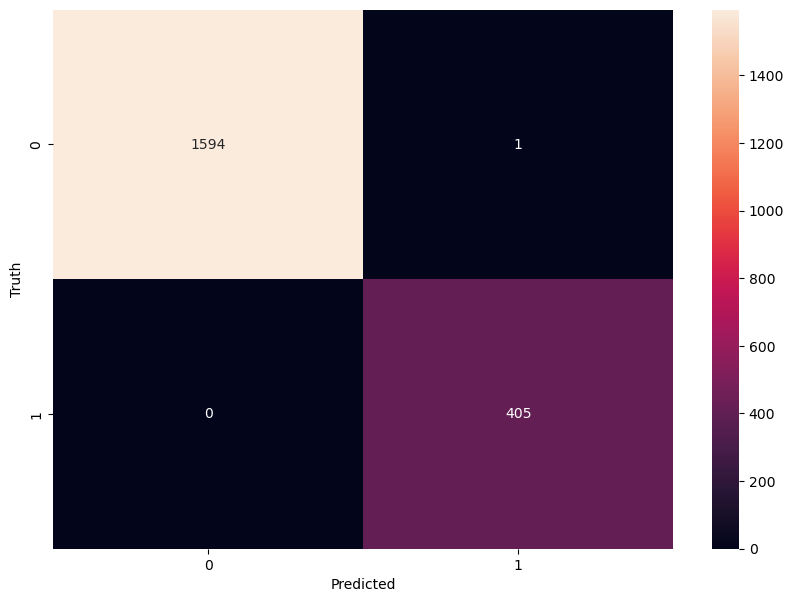

In [69]:
#Plot Confusion matrix
cm = tf.math.confusion_matrix(labels = y_test, predictions = yp)

import seaborn as sns
plt.figure(figsize = (10,7))
sns.heatmap(cm, annot = True, fmt = 'd')
plt.xlabel('Predicted')
plt.ylabel('Truth')